# Scenario

The design team has several new drivetrain configurations to choose from, each of which has implications for performance and fuel economy.

New car designs receive testing from environmental test agencies, who evaluate a car’s fuel economy in Miles Per Gallon (MPG). Cars that consume excess amounts of fuel receive a “Gas Guzzler Tax,” which is a consumption tax.

**Company leadership has issued a new, explicit requirement that all future designs avoid the Gas Guzzler Tax designation.**

While the US Environmental Protection Agency has its own regulations for a Gas Guzzler Tax [1], for the scenario in this article, cars qualify as a “Gas Guzzler” if they fail to achieve a target MPG of 21 or higher during environmental agency testing.


### Imports

In [6]:
# Data handling:
import pandas as pd

# Data visualization:
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Display Configuration:
%config InlineBackend.figure_format = 'retina'

# Data Collection

The data used is the Auto MPG dataset, available for use from the UC Irvine Machine Learning Library via a Creative Commons 4.0 License [2]. The data is accessible within Jupyter via the following code:

In [4]:
# !pip3 install -U ucimlrepo 

In [7]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset:
auto_mpg = fetch_ucirepo(id=9)

# Data (as pandas dataframes):
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Make into pandas dataframe:
mpg = pd.concat([X, y], axis=1)

# Fill NaNs with mean:
mpg = mpg.fillna(mpg.mean())

mpg.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0


# Data Wrangling

In [8]:
# Add the "Gas Guzzler" column based on the criteria:
mpg['mpg'] = mpg['mpg'].apply(lambda x: 1 if x < 21 else 0)
mpg = mpg.rename(columns={'mpg': 'gas_guzzler_tax'})
mpg.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,gas_guzzler_tax
0,307.0,8,130.0,3504,12.0,70,1,1
1,350.0,8,165.0,3693,11.5,70,1,1
2,318.0,8,150.0,3436,11.0,70,1,1
3,304.0,8,150.0,3433,12.0,70,1,1
4,302.0,8,140.0,3449,10.5,70,1,1


In [10]:
# Count of Gas Guzzlers (1) and non-Gas Guzzlers (0):
mpg.gas_guzzler_tax.value_counts()

gas_guzzler_tax
0    227
1    171
Name: count, dtype: int64

# Exploratory Data Analysis

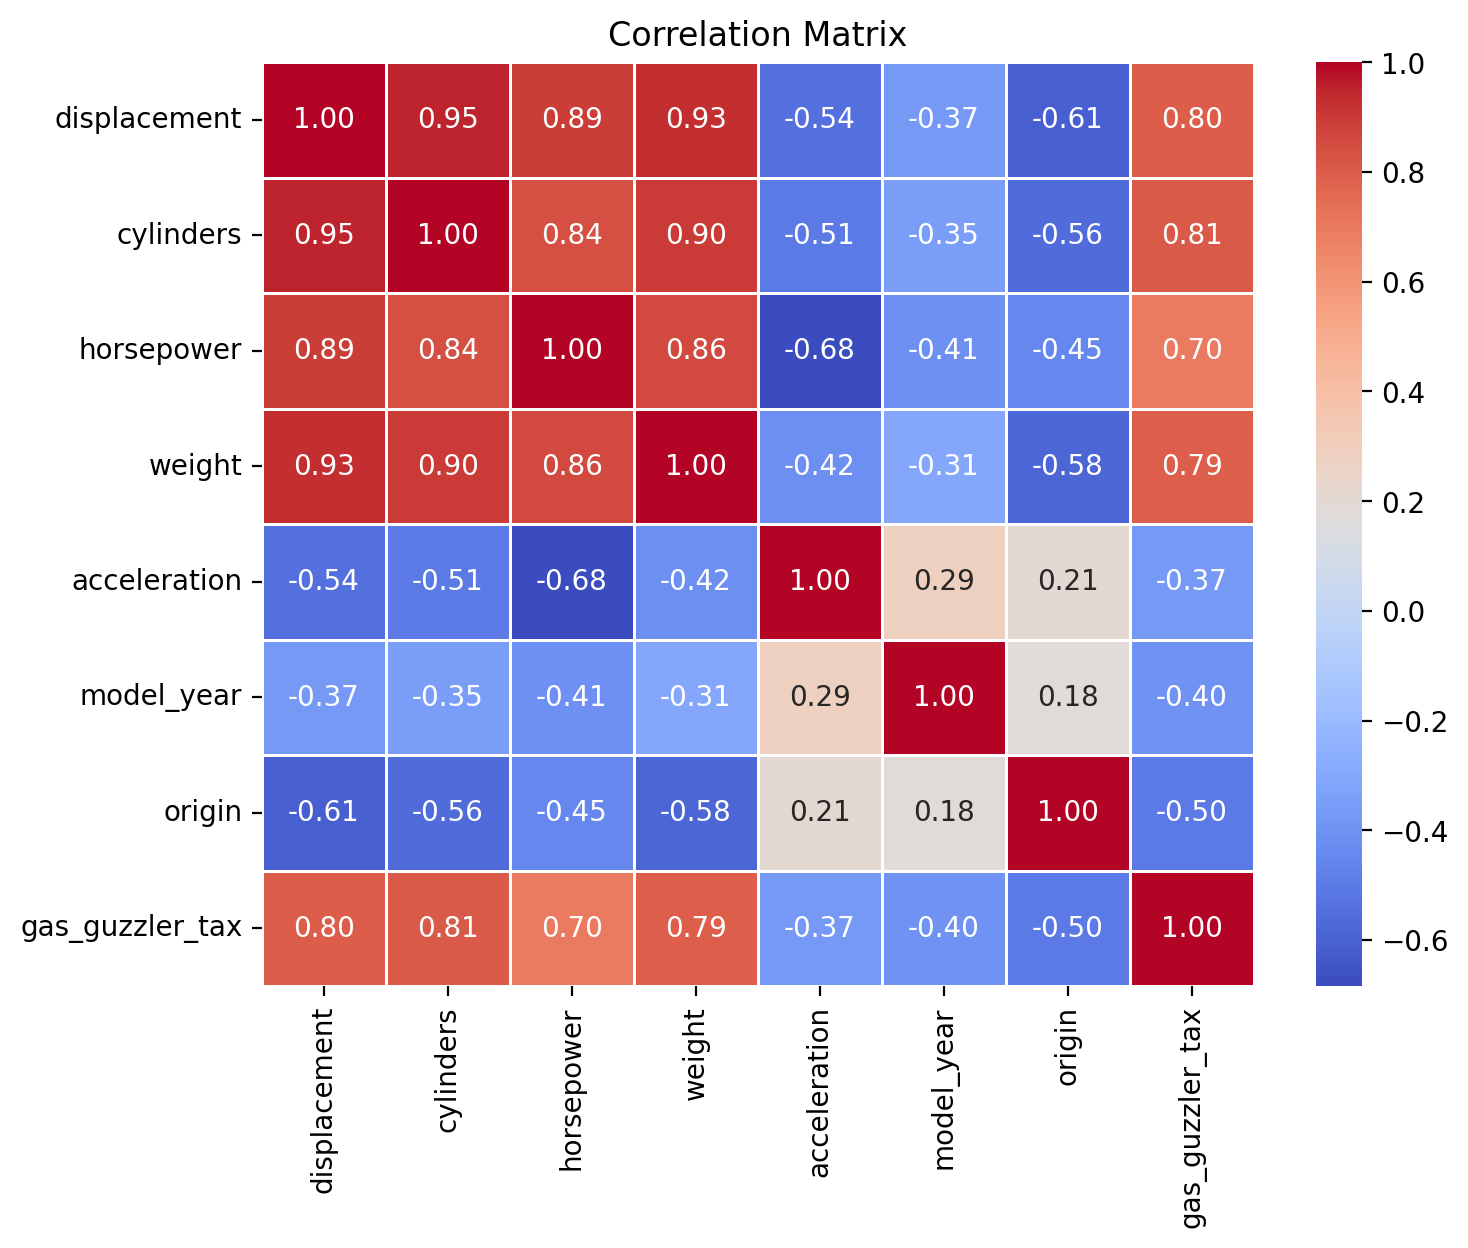

In [11]:
# Plot a correlation matrix:
plt.figure(figsize=(8, 6))
sns.heatmap(mpg.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


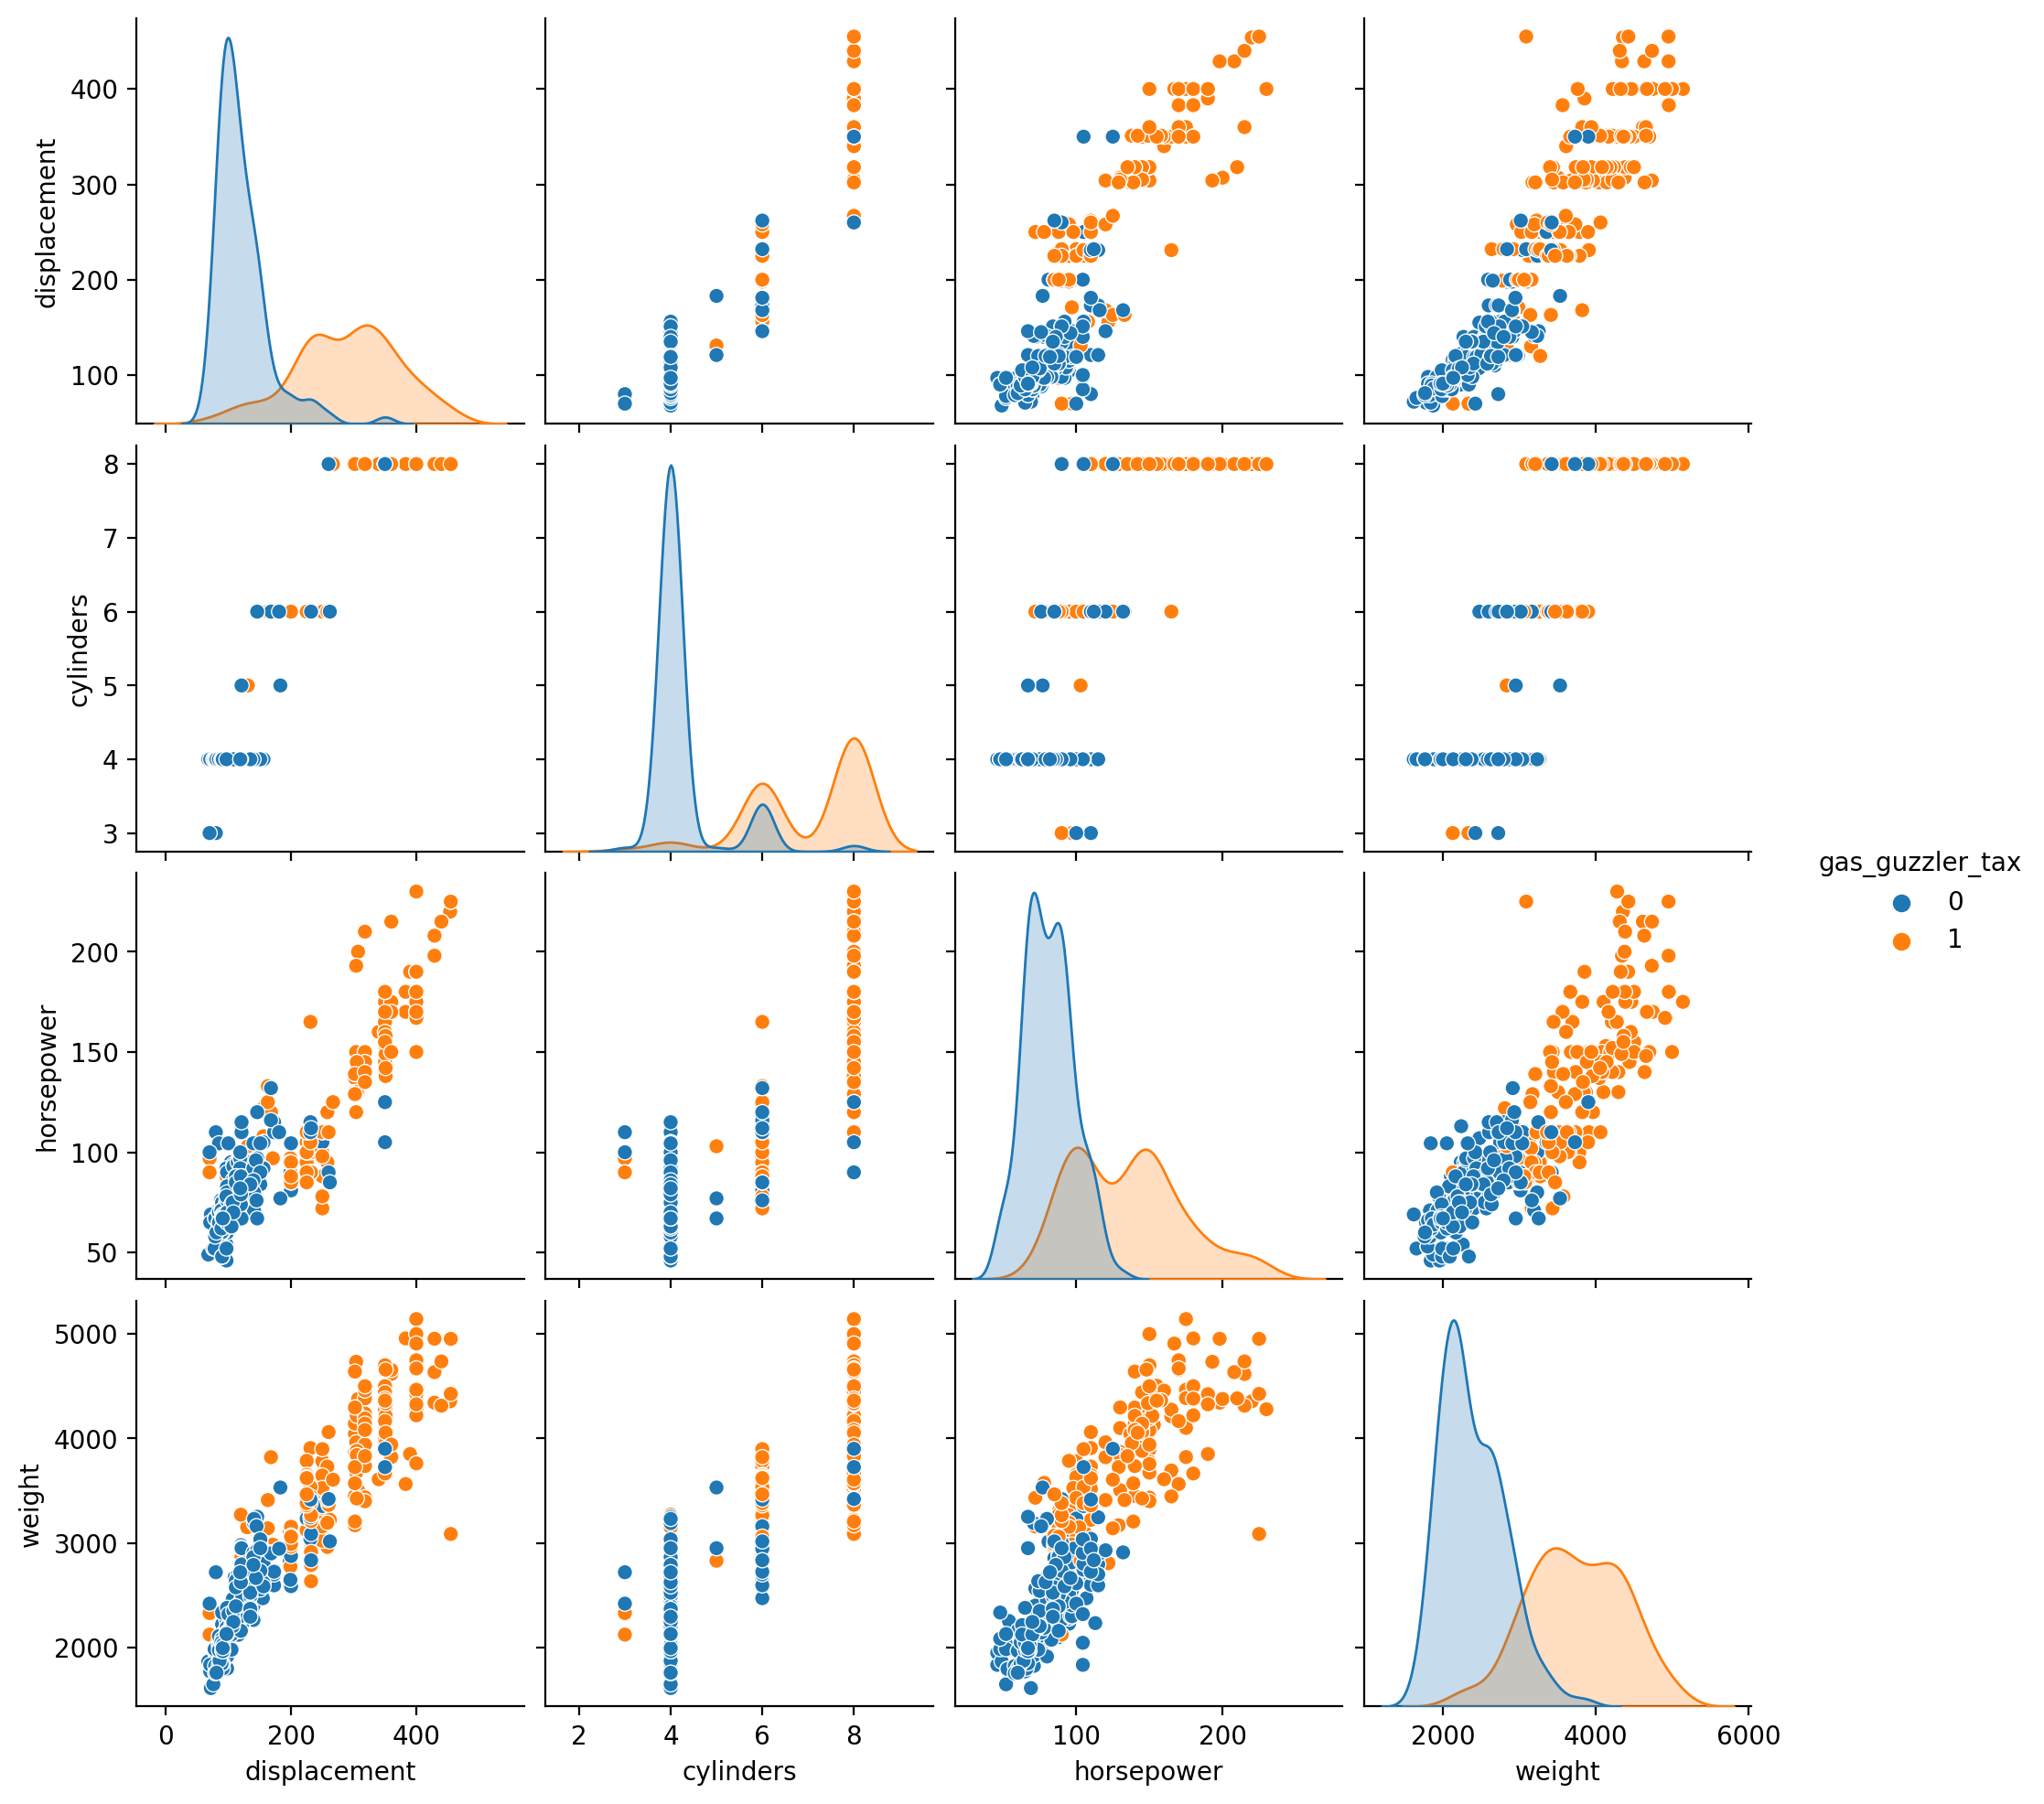

In [12]:
# Create a pairplot:
sns.pairplot(mpg[['displacement', 'cylinders', 'horsepower',
             'weight', 'gas_guzzler_tax']], hue='gas_guzzler_tax')

# Predictive Analyis

In [13]:
# Separate the target variable:
y = mpg['gas_guzzler_tax']
X = mpg.drop(columns='gas_guzzler_tax')

# Split into train and test:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train the model:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Test the model:
y_pred = rf_model.predict(X_test)

# Return the accuracy score:
rfAccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rfAccuracy)

Accuracy: 0.9375


# Confusion Matrix

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        50
           1       0.88      0.97      0.92        30

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



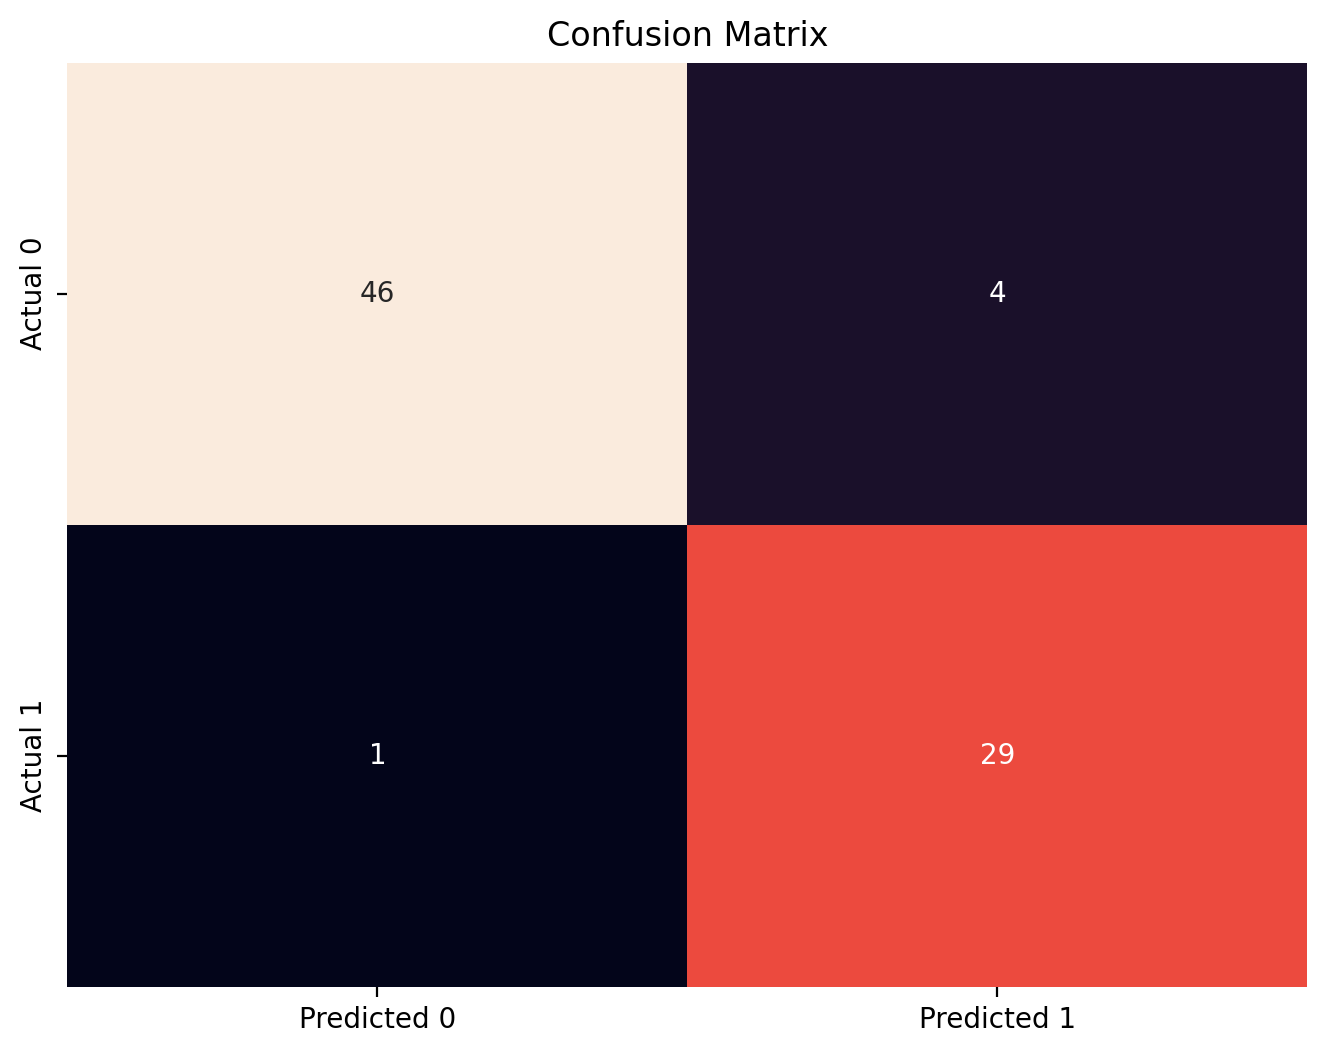

In [15]:
# Print classification report:
print('Classification Report:\n', classification_report(y_test, y_pred))

# Generate the plot:
plt.figure(figsize=(8, 6))

sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, cbar=False, fmt='d',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')

plt.show()

### Extract Feature Importances

In [16]:
# Get the feature importances:
rf_feature_importance = rf_model.feature_importances_
rf_feature_importance = pd.DataFrame(
    {'Feature': X.columns, 'Importance': rf_feature_importance})
rf_feature_importance = rf_feature_importance.sort_values(
    by='Importance', ascending=False)

rf_feature_importance.head()

,Feature,Importance
0,displacement,0.281249
1,cylinders,0.246752
3,weight,0.206637
2,horsepower,0.102168
5,model_year,0.066608


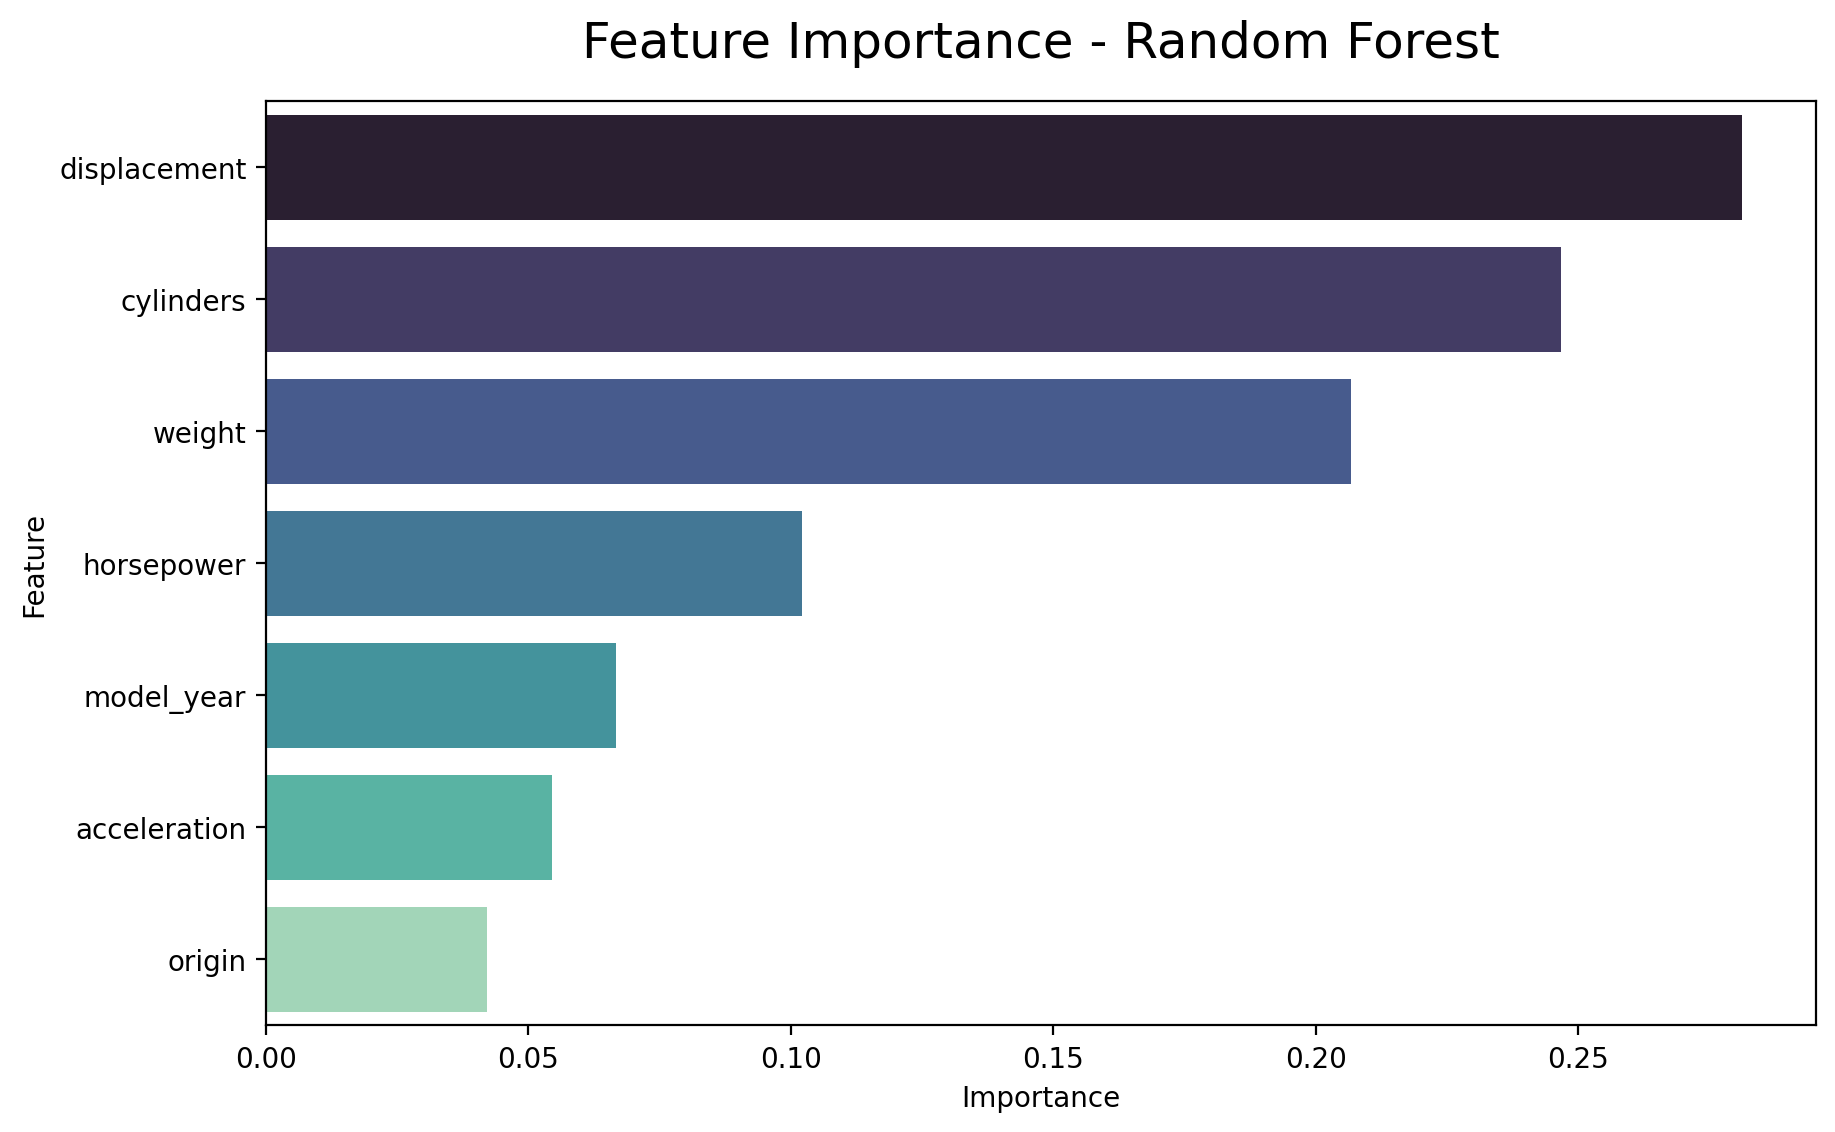

In [17]:
# Plot feature importance:

# Set plot size:
plt.figure(figsize=(10, 6))

# Feature importance:
sns.barplot(data=rf_feature_importance,
            x='Importance', y='Feature', palette='mako')

# Set labels:
plt.title('Feature Importance - Random Forest', fontsize=18, y=1.03)

plt.show()

# Testing

In [19]:
# Create car design dataframe:
car_designs = pd.DataFrame({
    'displacement': [305, 240, 240, 180],
    'cylinders': [8, 6, 6, 4],
    'horsepower': [225, 200, 190, 170],
    'weight': [3600, 3440, 3350, 3250],
    'acceleration': [7.1, 7.3, 7.6, 7.8],
    'model_year': [83, 83, 83, 83],
    'origin': [1, 1, 1, 1]
})

car_designs

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,305,8,225,3600,7.1,83,1
1,240,6,200,3440,7.3,83,1
2,240,6,190,3350,7.6,83,1
3,180,4,170,3250,7.8,83,1


In [20]:
# Make predictions on the new data points:
predictions = rf_model.predict(car_designs)

print(f'Predicted Class: {predictions}')

Predicted Class: [1 1 0 0]


In [23]:
# Get user input for each feature:
displacement = int(input("Enter displacement: "))
cylinders = int(input("Enter cylinders: "))
horsepower = int(input("Enter horsepower: "))
weight = int(input("Enter weight: "))
acceleration = float(input("Enter acceleration: "))
model_year = int(input("Enter model year: "))
origin = int(input("Enter origin: "))

# Create new data point for prediction:
car_design = pd.DataFrame({
    'displacement': [displacement],
    'cylinders': [cylinders],
    'horsepower': [horsepower],
    'weight': [weight],
    'acceleration': [acceleration],
    'model_year': [model_year],
    'origin': [origin]
})

# Make a prediction:
prediction = rf_model.predict(car_design)

print(f'Prediction: {prediction}')

Enter displacement: 300
Enter cylinders: 6
Enter horsepower: 300
Enter weight: 3500
Enter acceleration: 8
Enter model year: 83
Enter origin: 1
Prediction: [1]


### More charts

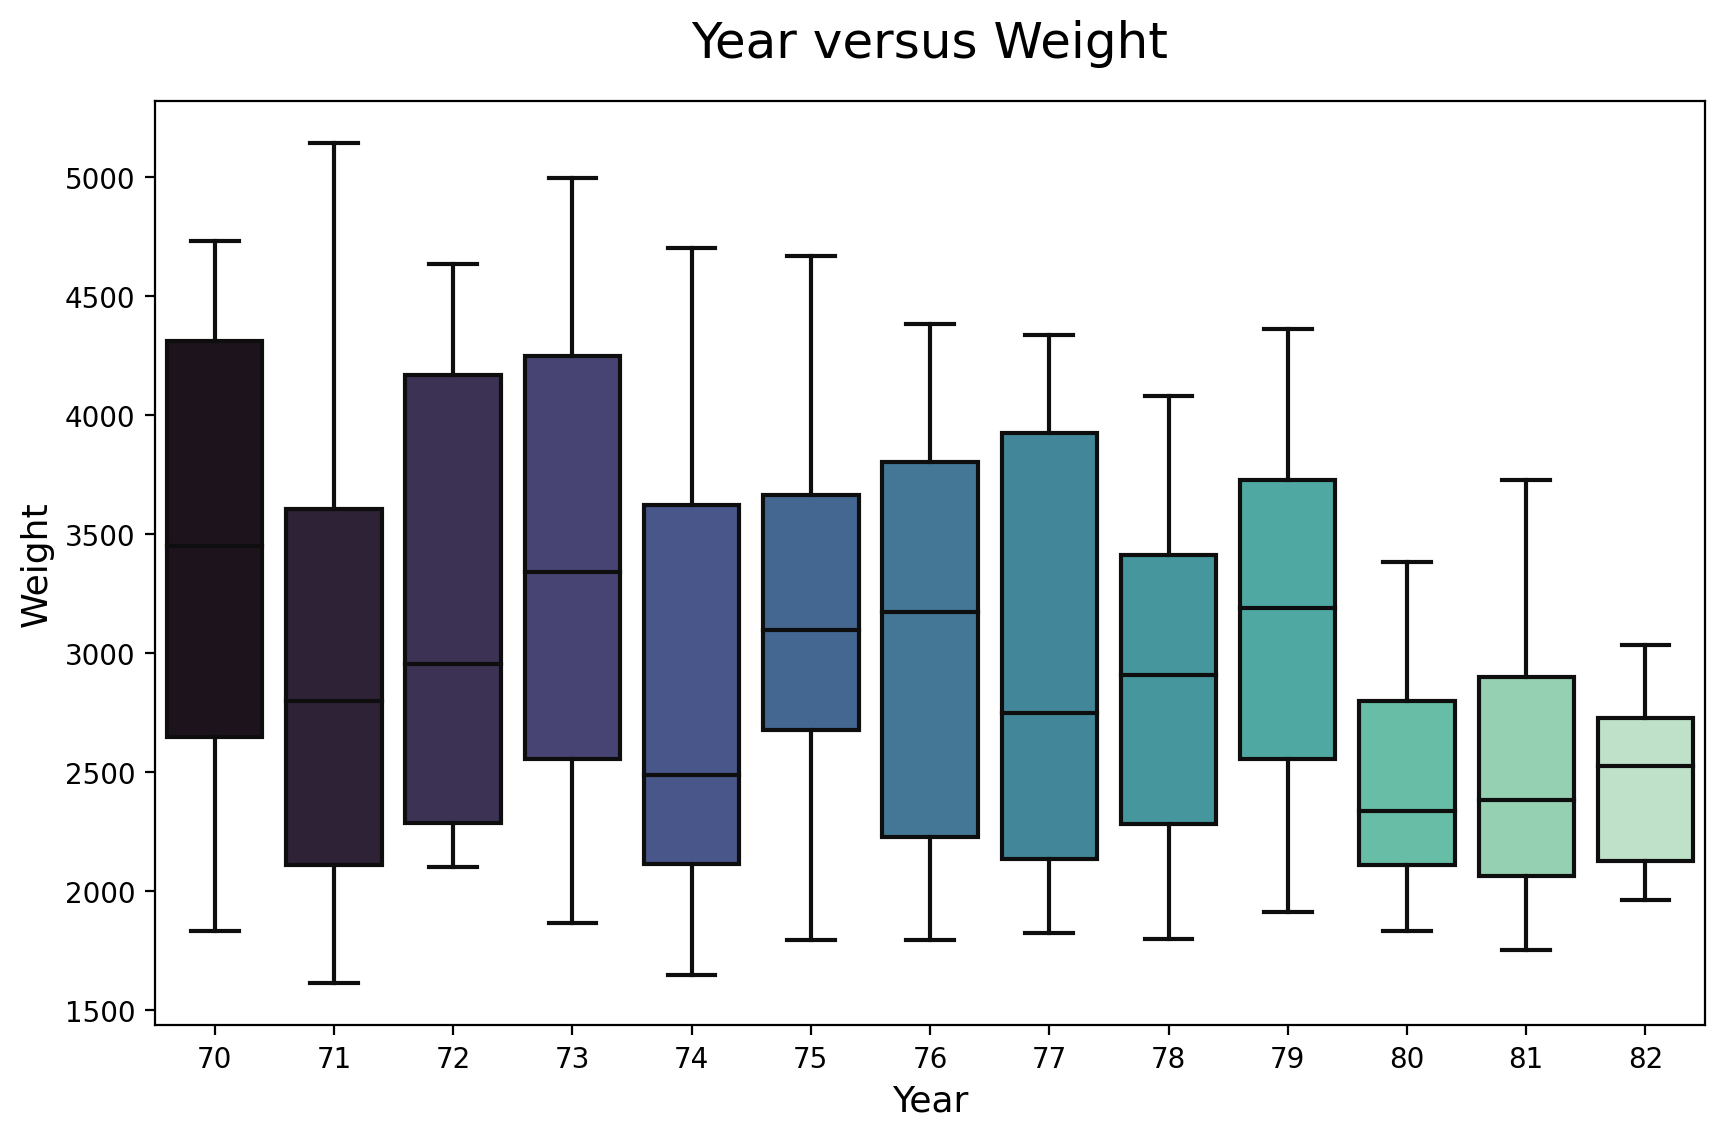

In [25]:
# Set plot size:
plt.figure(figsize=(10, 6))

# Create scatter plot:
sns.boxplot(data=mpg, x="model_year",
            y="weight", palette='mako')

# Set labels:
plt.title('Year versus Weight',
          fontsize=18, y=1.03)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Weight', fontsize=13)

plt.show()